# Dispersion Relations of Flavor Isospin Waves

## Huaiyu Duan (UNM)

## Flavor Isospin waves in dense neutrino gases

Consider the two-flavor fast oscillations in a 1D, axisymmetric neutrino gas without collisions. Let $\mathbf{P}_u(t,z)$ be the Bloch vector that represents the flavor content of the neutrinos and antineutrinos of velocity $u$ along the $z$ axis and at the time-space point $(t,z)$. Ignoring the vacuum Hamiltonian and in the co-rotating frame that the matter potential is 0, one has
$$
    (\partial_t + u\partial_z) \mathbf{P}_u
    = (\mathbf{N} - u\mathbf{F}) \times \mathbf{P}_u,
$$
where $\mathbf{N}=\int_{-1}^1 G(u)\mathbf{P}_u\mathrm{d}u$ and $\mathbf{F}=\int_{-1}^1 G(u)\mathbf{P}_u u\mathrm{d}u$ are the flavor density and flux, respectively. We will consider the monochromatic wave solution to the above equation with the following form:
\begin{align*}
    P_{u,1}(t,z) &= \tilde{P}_{u,\perp}\cos(\Omega t - K z + \phi), \\
    P_{u,2}(t,z) &= \tilde{P}_{u,\perp}\sin(\Omega t - K z + \phi), \\
    P_{u,3}(t,z) &= \tilde{P}_{u,3},
\end{align*}   
where $\tilde{P}_{u,\perp}^2 + \tilde{P}_{u,3}^2=1$, and $\Omega$, $K$, and $\phi$ are the frequency, wave number, and the initial phase of the wave.

A trivial wave solution to the equation of motion has $\tilde{P}_{u,3}=1$. Study of the dispersion relations (DRs) of the trivial wave solutions gives one an idea whether the neutrino gas that begins in the weak-interaction states are stable against flavor conversions. A nontrivial wave solution can be solved from the following equations:
\begin{align*}
    \tilde{P}_{u,\perp} &= \frac{(N_\perp - F_\perp u)\epsilon_u}
    {\sqrt{[(N_3-\Omega) - (F_3-K)u]^2 + (N_\perp - F_\perp u)^2}}, \\
    \tilde{P}_{u,3} &= \frac{[(N_3-\Omega) - (F_3-K)u]\epsilon_u}
    {\sqrt{[(N_3-\Omega) - (F_3-K)u]^2 + (N_\perp - F_\perp u)^2}},
\end{align*}
where $\epsilon_u=\pm1$ are the alignment signatures for different DR branches, $N_3$ and $N_\perp$ are the components of $\mathbf{N}$ that are parallel to and perpendicular to the flavor axis, respectively, and $F_3$ and $F_\perp$ are the corresponding components of $\mathbf{F}$. The values of $N_3$, $N_\perp$, $F_3$, and $F_\perp$ can be solved from the following consistency equations:
\begin{align*}
    N_\perp &= \int_{-1}^1 \frac{N_\perp - F_\perp u}
    {\sqrt{[(N_3-\Omega) - (F_3-K)u]^2 + (N_\perp - F_\perp u)^2}}\, G(u)\epsilon_u\,\mathrm{d} u, \\
    F_\perp &= \int_{-1}^1 \frac{N_\perp - F_\perp u}
    {\sqrt{[(N_3-\Omega) - (F_3-K)u]^2 + (N_\perp - F_\perp u)^2}}\, u G(u)\epsilon_u\,\mathrm{d} u, \\
    N_3 &= \int_{-1}^1 \frac{(N_3-\Omega) - (F_3-K)u}
    {\sqrt{[(N_3-\Omega) - (F_3-K)u]^2 + (N_\perp - F_\perp u)^2}}\, G(u)\epsilon_u\,\mathrm{d} u, \\
    F_3 &= \int_{-1}^1 \frac{(N_3-\Omega) - (F_3-K)u}
    {\sqrt{[(N_3-\Omega) - (F_3-K)u]^2 + (N_\perp - F_\perp u)^2}}\, u G(u)\epsilon_u\,\mathrm{d} u. 
\end{align*}
The equations for $N_\perp$ and $F_\perp$ are not independent because
$$ \frac{F_\perp}{N_\perp} = \frac{\Omega}{K}. $$

## DRs of trivial wave solutions

The DRs of the trivial solutions can be solved by linearizing the equation of motion [[arXiv:1610.01612]](https://arxiv.org/abs/1610.01612). The `trivialwave` module is a copy of `asdr` from the [`FOWDR` package](https://github.com/NuCO-UNM/fowdr) that compute the DRs of the trivial solution. Below is a simple example. Please see its documentation for more details.

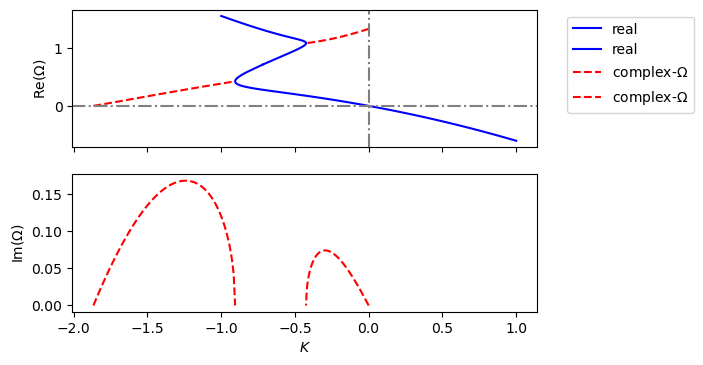

In [1]:
import matplotlib.pyplot as plt
import nugas.f2e0d1a.trivialwave as trwv

# ELN distribution
G = lambda u: 0.5 - 0.7 * u 

# plot the DRs
fig, axes = plt.subplots(2, 1, sharex=True, dpi=100)
dr_real =  trwv.DR_real(G, shift=False) # real DR
dr_cplx = trwv.DR_complexOmega(G, shift=False) # complex-Ω DR
for kk, ww in dr_real: # real DR
    axes[0].plot(kk, ww, 'b-', label='real')
for kk, ww in dr_cplx: # complex-Omega DR
    axes[0].plot(kk, ww.real, 'r--', label='complex-$\Omega$')
for kk, ww in dr_cplx: # complex-Omega DR
    axes[1].plot(kk, ww.imag, 'r--', label='complex-$\Omega$')

axes[0].axhline(0, ls='-.', color='grey') # x axis
axes[0].axvline(0, ls='-.', color='grey') # y axis
axes[0].legend(bbox_to_anchor=(1.05, 1), loc="upper left")
axes[0].set_ylabel('Re($\Omega$)')
axes[1].set_ylabel('Im($\Omega$)')
axes[1].set_xlabel('$K$')
plt.show()


## Nontrivial waves

The `nontrivialwave` module solves the nontrivial wave solutions. Because it involves solving a set of nonlinear equations, sometimes one needs to have a good initial guess to find the nontrivial wave solution. One should also check the final results to make sure that the solutions make sense.

Function `calcWave()` computes a potential wave solution for given wave number. Note that `F1` and `N1` represent $F_{\perp,u}$ and $N_{\perp,u}$, respectively.

In [2]:
import nugas.f2e0d1a.nontrivialwave as ntwv

help(ntwv.calcWave)

Help on function calcWave in module nugas.f2e0d1a.nontrivialwave:

calcWave(N3, K, G, alignment=1, Omega_guess=None, F1_guess=None, F3_guess=None, ytol=0.001, int_kargs={}, root_kargs={})
    Solve the wave solution with given N3 and K.
    N3 : lepton number density along the axis where it is constant.
    K : wave number.
    G(u) : ELN function.
    alignment : +/-1 indicating whether the polarization vector is aligned or antialigned with the H vector.
    Omega_guess : an initial guess for Omega.
    F1_guess : an initial guess for F1.
    F3_guess : an initial guess for F3.
    ytol : tolerance for the root function residue.
    int_kargs : keyword arguments to be passed to scipy.integrate.quad
    root_kargs : keyword arguments to be passed to scipy.optimize.root.
    
    return : (Omega, F1, F3), where Omega is the frequency of the collective, and Fi = integrate(G*u*Pi, (u,-1,1)) for i = 1, 3.



In [3]:
N3 = 1 # ELN density
K, Omega, F1, F3 = -2, 0.25, -0.02, -0.4 # wave number and initial guess
Omega, F1, F3 = ntwv.calcWave(N3, K, G, alignment=1, Omega_guess=Omega, F1_guess=F1, F3_guess=F3)
print(K, Omega, F1, F3)

-2 0.2527835586211527 -0.020067242663505274 -0.4383727752198316


With given $K$, $\Omega$, $F_\perp$, and $F_3$, one can use function `calcP1P3()` to compute the Bloch vectors.

In [4]:
help(ntwv.calcP1P3)

Help on function calcP1P3 in module nugas.f2e0d1a.nontrivialwave:

calcP1P3(u, K, Omega, N3, F1, F3, alignment)
    Compute the Bloch vectors of the nontrivial wave solution.
    u : z velocity component of the neutrino.
    K : wave number.
    Omega : frequency.
    N1 : integral of P1.
    N3 : integral of P3.
    F1 : integral of u*P1.
    F3 : integral of u*P3.
    alignment : +/-1.
    
    return : (P1, P3) in the wave solution.



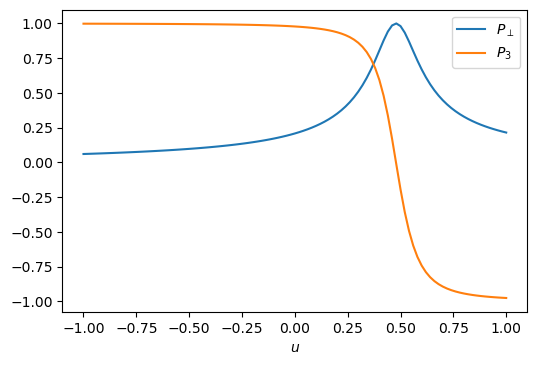

In [5]:
import numpy as np

u = np.linspace(-1, 1, 101) # z components of the neutrino velocities
P1, P3 = ntwv.calcP1P3(u, K, Omega, N3, F1, F3, alignment=1)

plt.figure(dpi=100)
plt.plot(u, P1, label='$P_{\perp}$')
plt.plot(u, P3, label='$P_3$')
plt.legend()
plt.xlabel('$u$')
plt.show()

One can use `DR_wv()` to compute the DRs of the nontrivial wave solutions.

In [6]:
help(ntwv.DR_wv)

Help on function DR_wv in module nugas.f2e0d1a.nontrivialwave:

DR_wv(N3, Ks, G, alignment=1, Omega_guess=None, F1_guess=None, F3_guess=None, ytol=0.001, int_kargs={}, root_kargs={})
    Solve the wave solution with given N3 and K.
    N3 : lepton number density along the axis where it is constant.
    Ks : an array of wave numbers for which Omegas are to be found.
    G(u) : ELN function.
    alignment : +/-1 indicating whether the polarization vector is aligned or antialigned with the H vector.
    Omega_guess : an initial guess for Omega.
    F1_guess : an initial guess for F1.
    F3_guess : an initial guess for F3.
    ytol : tolerance for the root function residue.
    int_kargs : keyword arguments to be passed to scipy.integrate.quad
    root_kargs : keyword arguments to be passed to scipy.optimize.root.
    
    return : (Ks, Omegas, F1s, F3s), where Omegas, F1s, and F3s are the solution parameters at Ks.



In [7]:
dr_wv1 = ntwv.DR_wv(N3, dr_cplx[1][0], G, Omega_guess=Omega, F1_guess=F1, F3_guess=F3, alignment=1)

Now do the same for the wave solutions with the alignment signature $\epsilon_u=-1$.

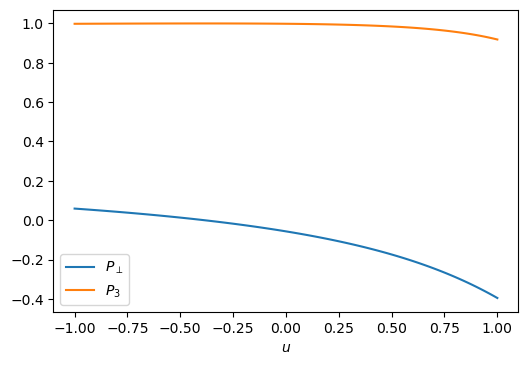

In [8]:
K, Omega, F1, F3 =dr_cplx[0][0][-2], dr_cplx[0][1][-2].real, -0.01, -0.4
Omega, F1, F3 = ntwv.calcWave(N3, K, G, alignment=-1, Omega_guess=Omega, F1_guess=F1, F3_guess=F3, root_kargs={'method': 'lm'})
P1, P3 = ntwv.calcP1P3(u, K, Omega, N3, F1, F3, alignment=-1)

plt.figure(dpi=100)
plt.plot(u, P1, label='$P_{\perp}$')
plt.plot(u, P3, label='$P_3$')
plt.legend()
plt.xlabel('$u$')
plt.show()

In [9]:
dr_wv2 = ntwv.DR_wv(N3, dr_cplx[0][0][-2::-1], G, Omega_guess=Omega, F1_guess=F1, F3_guess=F3, alignment=-1)

Now plot the DRs of the trivial and nontrivial waves together.

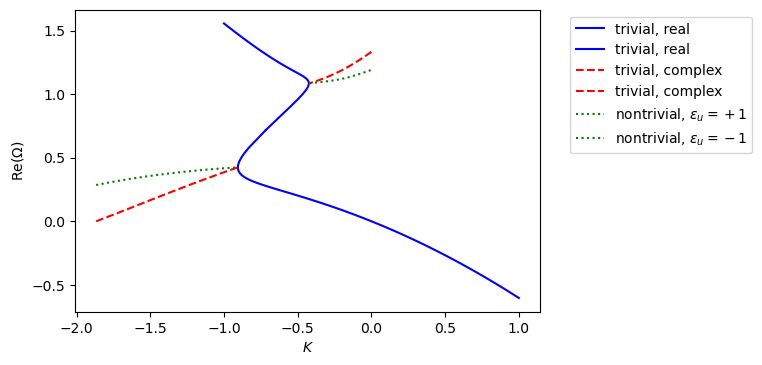

In [10]:
plt.figure(dpi=100)

for kk, ww in dr_real:
    plt.plot(kk, ww.real, 'b-', label='trivial, real')
for kk, ww in dr_cplx:
    plt.plot(kk, ww.real, 'r--', label='trivial, complex')
plt.plot(dr_wv1[0], dr_wv1[1], 'g:', label='nontrivial, $\epsilon_u=+1$')
plt.plot(dr_wv2[0], dr_wv2[1], 'g:', label='nontrivial, $\epsilon_u=-1$')

plt.xlabel('$K$')
plt.ylabel('Re($\Omega$)')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

## Acknowledgments

This material is based upon work supported by the U.S. Department of Energy, Office of Science, Office of Nuclear Physics under Award Number DE-SC-0017803.